## 机器学习
- 有监督学习
    - 回归（连续性变量）
    - 分类（离散型变量）
- 无监督学习

In [1]:
# 引入相关的计算包
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

### 1.1 回归
使用sklearn内置数据集Boston房价数据集

In [2]:
from sklearn import datasets
boston=datasets.load_boston()
x=boston.data
y=boston.target
features=boston.feature_names
boston_data=pd.DataFrame(x, columns=features)
boston_data["Price"]=y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


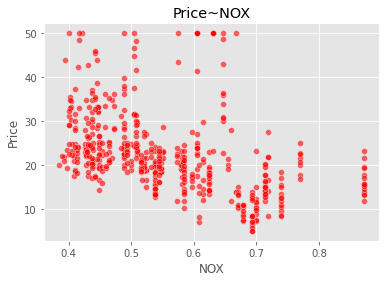

In [3]:
sns.scatterplot(boston_data['NOX'],boston_data['Price'],color="r",alpha=0.6)
plt.title("Price~NOX")
plt.show()

我们可以看到，数据给定任务所需要的因变量，因变量为波士顿房价Price是一个连续型变量，所以这是一个回归的例子。
各个特征的相关解释：
- CRIM：各城镇的人均犯罪率
- ZN：规划地段超过25,000平方英尺的住宅用地比例
- INDUS：城镇非零售商业用地比例
- CHAS：是否在查尔斯河边(=1是)
- NOX：一氧化氮浓度(/千万分之一)
- RM：每个住宅的平均房间数
- AGE：1940年以前建造的自住房屋的比例
- DIS：到波士顿五个就业中心的加权距离
- RAD：放射状公路的可达性指数
- TAX：全部价值的房产税率(每1万美元)
- PTRATIO：按城镇分配的学生与教师比例
- B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
- LSTAT：较低地位人口
- Price：房价

### 1.2 分类
以iris数据集为例：

In [4]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target
features = iris.feature_names
iris_data=pd.DataFrame(x, columns=[features])
iris_data['target']=y
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


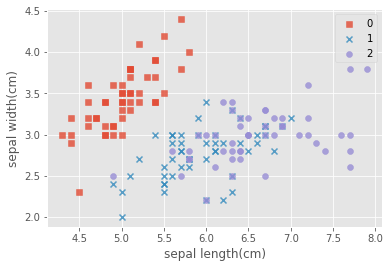

In [5]:
# 可视化特征
marker=['s','x','o']
for index,c in enumerate(np.unique(y)):
    plt.scatter(x=iris_data.loc[y==c,"sepal length (cm)"],
    y=iris_data.loc[y==c,"sepal width (cm)"],
    alpha=0.8,label=c,marker=marker[c]) # alpha:透明度;
plt.xlabel("sepal length(cm)")
plt.ylabel("sepal width(cm)")
plt.legend()
plt.show()

各个特征的相关解释：

- sepal length (cm)：花萼长度(厘米)
- sepal width (cm)：花萼宽度(厘米)
- petal length (cm)：花瓣长度(厘米)
- petal width (cm)：花瓣宽度(厘米)

### 1.3 无监督学习

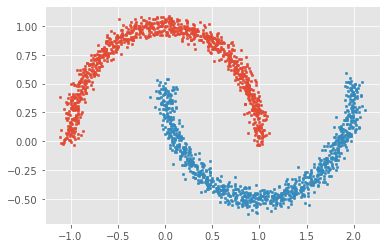

In [6]:
# 生成月牙型非凸集
from sklearn import datasets
x,y=datasets.make_moons(n_samples=2000,shuffle=True,noise=0.05,random_state=None)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=6) # s:点的大小
plt.show()

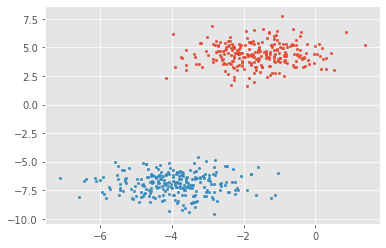

In [7]:
# 生成符合正太分布的聚类数据
from sklearn import datasets
from sklearn.utils.validation import _num_samples
x,y=datasets.make_blobs(n_samples=500,n_features=3,centers=2,random_state=True)
for index,c in enumerate(np.unique(y)):
    plt.scatter(x[y==c,0],x[y==c,1],s=6)
plt.show()

## 2.使用sklearn构建完整的机器学习项目流程
一般来说，一个完整的机器学习项目分为以下步骤：
- 明确项目任务：分类/回归
- 收集数据集并选择合适的特征
- 选择度量模型性能的指标
- 选择具体的模型并进行训练以优化模型
- 评估模型的性能并调参

### 2.1 使用sklearn构建完整的回归项目
#### (1) 收集数据集并选择合适的特征
以Boston房价数据集为例：

In [8]:
from sklearn import datasets
boston = datasets.load_boston()
x=boston.data
y=boston.target
features=boston.feature_names
boston_data=pd.DataFrame(x, columns=[features])
boston_data["Price"]=y
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


各个特征的相关解释：
- CRIM：各城镇的人均犯罪率
- ZN：规划地段超过25,000平方英尺的住宅用地比例
- INDUS：城镇非零售商业用地比例
- CHAS：是否在查尔斯河边(=1是)
- NOX：一氧化氮浓度(/千万分之一)
- RM：每个住宅的平均房间数
- AGE：1940年以前建造的自住房屋的比例
- DIS：到波士顿五个就业中心的加权距离
- RAD：放射状公路的可达性指数
- TAX：全部价值的房产税率(每1万美元)
- PTRATIO：按城镇分配的学生与教师比例
- B：1000(Bk - 0.63)^2其中Bk是每个城镇的黑人比例
- LSTAT：较低地位人口
- Price：房价

#### (2) 选择度量性能的指标
- MSE均方误差：$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$
   - MAE平均绝对误差:$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$
   - $R^2$决定系数：$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
   - 解释方差得分:$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$

#### (3) 选择具体的模型并进行训练
**(a) 选择线性回归模型**
选择MSE均方误差为性能指标

In [9]:
from sklearn import linear_model
lin_regression=linear_model.LinearRegression()
lin_regression.fit(x,y)
print("模型系数：",lin_regression.coef_) # 输出模型的系数
print("模型得分：",lin_regression.score(x,y)) # 输出模型的决定系数R^2

模型系数： [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
模型得分： 0.7406426641094095


**(b)线性回归的推广**

当数据是非线性的，线性回归的模型就不能很好的满足预测的需求

为了体现因变量和特征的非线性关系，一个很自然而然的想法就是将标准的线性回归模型：             
   $$
   y_i = w_0 + w_1x_i + \epsilon_i
   $$               
   **1.换成一个多项式函数：**          
   $$
   y_i = w_0 + w_1x_i + w_2x_i^2 + ...+w_dx_i^d + \epsilon
   $$ 

  **2.广义可加模型（GAM）**
                  
   $$
   y_i = w_0 + \sum\limits_{j=1}^{p}f_{j}(x_{ij}) + \epsilon_i
   $$ 

   GAM模型的优点与不足：             
      - 优点：简单容易操作，能够很自然地推广线性回归模型至非线性模型，使得模型的预测精度有所上升；由于模型本身是可加的，因此GAM还是能像线性回归模型一样把其他因素控制不变的情况下单独对某个变量进行推断，极大地保留了线性回归的易于推断的性质。
      - 缺点：GAM模型会经常忽略一些有意义的交互作用，比如某两个特征共同影响因变量，不过GAM还是能像线性回归一样加入交互项$x^{(i)} \times x^{(j)}$的形式进行建模；但是GAM模型本质上还是一个可加模型，如果我们能摆脱可加性模型形式，可能还会提升模型预测精度，详情请看后面的算法。

**多项式回归实例**

sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C'):

参数：

degree：特征转换的阶数。

interaction_onlyboolean：是否只包含交互项，默认False。

include_bias：是否包含截距项，默认True。

order：str in {‘C’, ‘F’}, default ‘C’，输出数组的顺序。

In [10]:
# 演示多项式回归
from sklearn.preprocessing import PolynomialFeatures
X_arr=np.arange(6).reshape(3,2)
print("原始X为：\n",X_arr)

poly=PolynomialFeatures(2)
print("2次转化X：\n",poly.fit_transform(X_arr))

poly = PolynomialFeatures(interaction_only=True)
print("2次转化X：\n",poly.fit_transform(X_arr))

原始X为：
 [[0 1]
 [2 3]
 [4 5]]
2次转化X：
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
2次转化X：
 [[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


解释：
$
(x_{1},x_{2}) ==> (1,x_{1},x_{2},x_{1}x_{2},x_{1}^{2},x_{2}^{2})
$

In [11]:
# 演示GAM模型
from pygam import LinearGAM
gam=LinearGAM().fit(boston_data[boston.feature_names],y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    103.2423
Link Function:                     IdentityLink Log Likelihood:                                 -1589.7653
Number of Samples:                          506 AIC:                                             3388.0152
                                                AICc:                                            3442.7649
                                                GCV:                                               13.7683
                                                Scale:                                              8.8269
                                                Pseudo R-Squared:                                   0.9168
Feature Function                  Lam

- 回归树

如果特征变量与因变量的关系能很好的用线性关系来表达，那么线性回归通常有着不错的预测效果，拟合效果则优于不能揭示线性结构的回归树。反之，如果特征变量与因变量的关系呈现高度复杂的非线性，那么树方法比传统方法更优。

sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0）

参数：(列举几个重要的，常用的，详情请看上面的官网)

criterion：{“ mse”，“ friedman_mse”，“ mae”}，默认=“ mse”。衡量分割标准的函数。

splitter：{“best”, “random”}, default=”best”。分割方式。

max_depth：树的最大深度。

min_samples_split：拆分内部节点所需的最少样本数，默认是2。

min_samples_leaf：在叶节点处需要的最小样本数。默认是1。

min_weight_fraction_leaf：在所有叶节点处（所有输入样本）的权重总和中的最小加权分数。如果未提供sample_weight，则样本的权重相等。默认是0。

In [12]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5)
reg_tree.fit(x,y)
reg_tree.score(x,y)

0.9376307599929274

- 支持向量机回归（SVR）

sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

参数：

kernel：核函数，{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, 默认=’rbf’。

degree：多项式核函数的阶数。默认 = 3。

C：正则化参数，默认=1.0。

epsilon：SVR模型允许的不计算误差的邻域大小。默认0.1。

In [13]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler # 标准化数据
from sklearn.pipeline import make_pipeline # 使用管道，把预处理和模型形成一个流程

reg_svr=make_pipeline(StandardScaler(),SVR(C=1.0,epsilon=0.2))
reg_svr.fit(x,y)
reg_svr.score(x,y)

0.7024525421955277

#### (4) 优化基础模型

**(a) 训练均方误差与测试均方误差**

在回归中，最常用的评价指标为均方误差，即：$MSE = \frac{1}{N}\sum\limits_{i=1}^{N}(y_i -\hat{ f}(x_i))^2$

一般来说，我们并不关心模型在训练集上的训练均方误差，我们关心的是测试集上的均方误差。因为训练集均方误差最小时，不能保证测试均方误差也很小。很有可能会出现**过拟合**。

**(b) 偏差-方差的权衡**

可以证明：
$$
   E\left(y_{0}-\hat{f}\left(x_{0}\right)\right)^{2}=\operatorname{Var}\left(\hat{f}\left(x_{0}\right)\right)+\left[\operatorname{Bias}\left(\hat{f}\left(x_{0}\right)\right)\right]^{2}+\operatorname{Var}(\varepsilon)
   $$

一般来说，模型的复杂度越高，f的方差就会越大。

另一方面，模型的偏差是指：为了选择一个简单的模型去估计真实函数所带入的误差。假如真实的数据X与Y的关系是二次关系，但我们选择了线性模型去建模，那由于模型的复杂度引起的这种误差我们称为偏差。

偏差度量了学习算法的期望预测与真实结果的偏离程度，即刻画了学习算法本身的拟合能力。偏差度量的是单个模型的学习能力，而方差度量的是同一个模型在不同数据集上的稳定性。

一般而言，增加模型的复杂性，会增加模型的方差，但会减少模型的偏差，我们要找一个方差-偏差的权衡，使得测试均方差误差最小。

**(c) 特征提取**

- 训练误差修正

我们先构造一个特征较多的模型使其过拟合，此时训练误差很小，而测试误差很大，这时我们加入关于特征个数的惩罚。
 $C_p = \frac{1}{N}(RSS  +  2d\hat{\sigma}^2)$，其中d为模型特征个数，$RSS = \sum\limits_{i=1}^{N}(y_i-\hat{f}(x_i))^2$，$\hat{\sigma}^2$为模型预测误差的方差的估计值，即残差的方差。                       
      AIC赤池信息量准则：$AIC = \frac{1}{d\hat{\sigma}^2}(RSS  +  2d\hat{\sigma}^2)$                              
      BIC贝叶斯信息量准则：$BIC = \frac{1}{n}(RSS + log(n)d\hat{\sigma}^2)$ 
- 交叉验证

前面讨论的对训练误差修正得到测试误差的估计是间接方法，这种方法的桥梁是训练误差，而交叉验证则是对训练误差的直接估计。交叉验证比训练误差修正的优势在于：能够给出测试误差的一个直接估计。以K折交叉验证为例：

我们把训练样本分成K等分，然后用K-1个样本集当做训练集，剩下的一份样本集为验证集去估计由K-1个样本集得到的模型的精度，这个过程重复K次取平均值得到测试误差的一个估计$CV_{(K)} = \frac{1}{K}\sum\limits_{i=1}^{K}MSE_i$

在测试误差能够被合理的估计出来以后，我们做特征选择的目标就是：从P个特征中选择M个特征，使得对应的模型的测试误差的估计最小。对应的方法有：
- 最优子集选择

      (i) 记不含任何特征的模型为$M_0$，计算这个$M_0$的测试误差。                                              
      (ii) 在$M_0$基础上增加一个变量，计算p个模型的RSS，选择RSS最小的模型记作$M_1$，并计算该模型$M_1$的测试误差。                                        
      (iii) 再增加变量，计算p-1个模型的RSS，并选择RSS最小的模型记作$M_2$，并计算该模型$M_2$的测试误差。                                                
      (iv) 重复以上过程直到拟合的模型有p个特征为止，并选择p+1个模型$\{M_0,M_1,...,M_p \}$中测试误差最小的模型作为最优模型。        
                         
- 向前逐步选择：

      最优子集选择虽然在原理上很直观，但是随着数据特征维度p的增加，子集的数量为$2^p$，计算效率非常低下且需要的计算内存也很高，在大数据的背景下显然不适用。因此，我们需要把最优子集选择的运算效率提高，因此向前逐步选择算法的过程如下： 

      (i) 记不含任何特征的模型为$M_0$，计算这个$M_0$的测试误差。                    
      (ii) 在$M_0$基础上增加一个变量，计算p个模型的RSS，选择RSS最小的模型记作$M_1$，并计算该模型$M_1$的测试误差。                  
      (iii) 在最小的RSS模型下继续增加一个变量，选择RSS最小的模型记作$M_2$，并计算该模型$M_2$的测试误差。                  
      (iv) 以此类推，重复以上过程直到拟合的模型有p个特征为止，并选择p+1个模型$\{M_0,M_1,...,M_p \}$中测试误差最小的模型作为最优模型。

**(d) 压缩估计（正则化）**

- 岭回归（L2正则化的例子）

  在线性回归中，我们的损失函数为$J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2$，我们在线性回归的损失函数的基础上添加对系数的约束或者惩罚，即：   
     $$
     J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2 + \lambda\sum\limits_{j=1}^{p}w_j^2,\;\;其中，\lambda \ge 0\\
     \hat{w} = (X^TX + \lambda I)^{-1}X^TY
     $$

   调节参数$\lambda$的大小是影响压缩估计的关键，$\lambda$越大，惩罚的力度越大，系数则越趋近于0，反之，选择合适的$\lambda$对模型精度来说十分重要。岭回归通过牺牲线性回归的无偏性降低方差，有可能使得模型整体的测试误差较小，提高模型的泛化能力。                                 
     - Lasso回归(L1正则化的例子)： 
                 
     岭回归的一个很显著的特点是：将模型的系数往零的方向压缩，但是岭回归的系数只能呢个趋于0但无法等于0，换句话说，就是无法做特征选择。能否使用压缩估计的思想做到像特征最优子集选择那样提取出重要的特征呢？答案是肯定的！我们只需要对岭回归的优化函数做小小的调整就行了，我们使用系数向量的L1范数替换岭回归中的L2范数：   
                       
     $$J(w) = \sum\limits_{i=1}^{N}(y_i-w_0-\sum\limits_{j=1}^{p}w_jx_{ij})^2 + \lambda\sum\limits_{j=1}^{p}|w_j|,\;\;其中，\lambda \ge 0$$

**(e) 降维**

将原始的特征空间投影到一个低维的空间实现变量的数目减少。降维的本质是学习一个映射函数f：x->y, 其中的x是原始数据，y是数据点映射后的低维向量表达。f可能是显式的或隐式的、线性的或非线性的。之所以使用降维后的数据表示，是因为在原始的高维空间中包含有冗余信息和噪声信息，在实际应用中造成了误差，降低了准确率。

主成分分析(PCA)

主成分分析的思想：通过**最大投影方差**将原始空间进行重构，即有特征相关重构为无关，即落在某个方向上的点（投影）的方差最大。在进行下一步推导之前，我们先把样本均值和样本协方差矩阵推广至矩阵形式：                     
   样本均值Mean:$\bar{x} = \frac{1}{N}\sum\limits_{i=1}^{N}x_i =  \frac{1}{N}X^T1_N,\;\;\;其中1_N = (1,1,...,1)_{N}^T$                         
   样本协方差矩阵$S^2 = \frac{1}{N}\sum\limits_{i=1}^{N}(x_i-\bar{x})(x_i-\bar{x})^T = \frac{1}{N}X^THX,\;\;\;其中，H = I_N - \frac{1}{N}1_N1_N^T$                             
   最大投影方差的步骤：                
   (i) 中心化：$x_i - \bar{x}$                       
   (ii) 计算每个点$x_1,...,x_N$至$\vec{u}_1$方向上的投影：$(x_i-\bar{x})\vec{u}_1,\;\;\;||\vec{u}_1|| = 1$                             
   (iii) 计算投影方差：$J = \frac{1}{N}\sum\limits_{i=1}^{N}[(x_i-\bar{x})^T\vec{u}_1]^2,\;\;\;||\vec{u}_1|| = 1$                           
   (iv) 最大化投影方差求$\vec{u}_1$：                       
   $$
   \bar{u}_1 = argmax_{u_1}\;\;\frac{1}{N}\sum\limits_{i=1}^{N}[(x_i-\bar{x})^T\vec{u}_1]^2 \\
   \;\;\;s.t. \vec{u}_1^T\vec{u}_1 = 1 (\vec{u}_1往后不带向量符号)
   $$                         
   得到：               
   $$
   J = \frac{1}{N}\sum\limits_{i=1}^{N}[(x_i-\bar{x})^T\vec{u}_1]^2  = \frac{1}{N}\sum\limits_{i=1}^{N}[u_1^T(x_i-\bar{x})(x_i-\bar{x})^Tu_1]\\
   \; = u_1^T[\frac{1}{N}\sum\limits_{i=1}^{N}(x_i-\bar{x})(x_i - \bar{x})^T]u_1 = u_1^TS^2u_1
   $$                    
   即：           
   $$
   \hat{u}_1 = argmax_{u_1}u_1^TS^2u_1,\;\;\;s.t.u_1^Tu_1 = 1\\
   L(u_1,\lambda) = u_1^TS^2u_1 + \lambda (1-u_1^Tu_1)\\
   \frac{\partial L}{\partial u_1} = 2S^2u_1-2\lambda u_1 = 0\\
   即：S^2u_1 = \lambda u_1
   $$                        
   可以看到：$\lambda$为$S^2$的特征值，$u_1$为$S^2$的特征向量。因此我们只需要对中心化后的协方差矩阵进行特征值分解，得到的特征向量即为投影方向。如果需要进行降维，那么只需要取p的前M个特征向量即可。

#### 特征提取的实例：向前逐步回归

根据AIC准则定义向前逐步回归进行变量筛选

In [14]:
# 定义向前逐步回归函数
def forward_select(data, target):
    variate =set()   # 将字段名转换成字典类型
    for column in data.drop(target, axis='columns').columns:
        variate.add(''.join(list(column)))
    selected = [] 
    current_score, best_new_score = float('inf'), float('inf')  # 目前的分数和最好的分数初始值都为无穷(AIC越小越好)
    # 循环筛选变量
    while variate:
        aic_with_variate = []
        for candidate in variate:  # 逐个遍历自变量
            candidate=''.join(list(candidate))
            formula="{}~{}".format(target,"+".join(selected+[candidate]))  #将自变量名连接起来
            aic = ols(formula=formula, data=data).fit().aic  # 利用ols训练模型得出AIC值
            aic_with_variate.append((aic, candidate))  # 将AIC值放进列表
        aic_with_variate.sort(reverse=True)  # 降序排列AIC值
        best_new_score, best_candidate = aic_with_variate.pop()  # 最好的AIC值等于删除列表的最后一个值，以及最好的自变量等于列表的最后一个自变量
        if current_score > best_new_score:  # 如果目前的AIC值大于最好的AIC值
            variate.remove(best_candidate)  # 移除此自变量，后面的循环不再使用此自变量（即被选中）
            selected.append(best_candidate)  # 加入选中列表
            current_score = best_new_score  # 更新目前的AIC值
            print("AIC is {},continuing!".format(current_score))
        else:
            print("for selection over!")
            break
    formula = "{}~{}".format(target, "+".join(selected))
    print("final formula is {}".format(formula))
    model = ols(formula=formula, data=data).fit()
    return (model)

In [15]:
import statsmodels.api as sm # 最小二乘
from statsmodels.formula.api import ols # 加载ols模型
forward_select(data=boston_data,target="Price")

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
AIC is 3286.974956900157,continuing!
AIC is 3171.5423142992013,continuing!
AIC is 3114.0972674193326,continuing!
AIC is 3097.359044862759,continuing!
AIC is 3069.438633167217,continuing!
AIC is 3057.9390497191152,continuing!
AIC is 3048.438382711162,continuing!
AIC is 3042.274993098419,continuing!
AIC is 3040.154562175143,continuing!
AIC is 3032.0687017003256,continuing!
AIC is 3021.726387825062,continuing!
for selection over!
final formula is Price~LSTAT+RM+PTRATIO+DIS+NOX+CHAS+B+ZN+CRIM+RAD+TAX


In [16]:
lm=ols("Price~LSTAT+RM+PTRATIO+DIS+NOX+CHAS+B+ZN+CRIM+RAD+TAX",data=boston_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 27 Mar 2021   Prob (F-statistic):          5.54e-137
Time:                        23:27:16   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
RM             3.8016      0.406      9.356      0.000       3.003       4.600
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
B              0.0093      0.003      3.475      0.001       0.004       0.015
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**岭回归实例**

sklearn.linear_model.ridge_regression(X, y, alpha, *, sample_weight=None, solver='auto', max_iter=None, tol=0.001, verbose=0, random_state=None, return_n_iter=False, return_intercept=False, check_input=True)
- 参数：
    alpha：较大的值表示更强的正则化。浮点数

    sample_weight：样本权重，默认无。
    
    solver：求解方法，{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}, 默认=’auto’。“ svd”使用X的奇异值分解来计算Ridge系数。'cholesky'使用标准的scipy.linalg.solve函数通过dot（XT，X）的Cholesky分解获得封闭形式的解。'sparse_cg'使用scipy.sparse.linalg.cg中的共轭梯度求解器。作为一种迭代算法，对于大规模数据（可能设置tol和max_iter），此求解器比“ Cholesky”更合适。 lsqr”使用专用的正则化最小二乘例程scipy.sparse.linalg.lsqr。它是最快的，并且使用迭代过程。“ sag”使用随机平均梯度下降，“ saga”使用其改进的无偏版本SAGA。两种方法都使用迭代过程，并且当n_samples和n_features都很大时，通常比其他求解器更快。请注意，只有在比例大致相同的要素上才能确保“ sag”和“ saga”快速收敛。您可以使用sklearn.preprocessing中的缩放器对数据进行预处理。最后五个求解器均支持密集和稀疏数据。但是，当fit_intercept为True时，仅'sag'和'sparse_cg'支持稀疏输入。

In [17]:
from sklearn import linear_model
reg_rid = linear_model.Ridge(alpha=.5)
reg_rid.fit(x,y)
reg_rid.score(x,y)

0.739957023371629

**Lasso实例**

sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

- 参数：
    alpha：正则化强度，1.0代表标准最小二乘。

    fit_intercept：是否计算模型截距。默认true。

    normalize：是否标准化，默认false。
    
    positive：是否强制系数为正，默认false。

In [18]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha = 0.5)
reg_lasso.fit(x,y)
reg_lasso.score(x,y)

0.7140164719858566

**(5) 对模型超参数进行调优**
- 网格搜索GridSearchCV
    网格搜索的思想非常简单，比如你有2个超参数需要去选择，那你就把所有的超参数选择列出来分别做排列组合。举个例子：$\lambda = 0.01,0.1,1.0$和$\alpha = 0.01,0.1,1.0$,你可以做一个排列组合，即：{[0.01,0.01],[0.01,0.1],[0.01,1],[0.1,0.01],[0.1,0.1],[0.1,1.0],[1,0.01],[1,0.1],[1,1]}  ，然后针对每组超参数分别建立一个模型，然后选择测试误差最小的那组超参数。换句话说，我们需要从超参数空间中寻找最优的超参数，很像一个网格中找到一个最优的节点，因此叫网格搜索。
- 随机搜索RandomizedSearchCV
    网格搜索相当于暴力地从参数空间中每个都尝试一遍，然后选择最优的那组参数，这样的方法显然是不够高效的，因为随着参数类别个数的增加，需要尝试的次数呈指数级增长。如果使用随机搜索的方式，这种方式不仅高效，而且通常比网格搜索要好。与网格搜索相比，有两个主要优点：
    - 可独立于参数数量和可能的值来选择计算成本。
    - 添加不影响性能的参数不会降低效率

使用SVR的例子，结合管道来进行调优：

In [19]:
# 先对未调参的SVR进行评价
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline # 引入管道简化学习流程
from sklearn.preprocessing import StandardScaler # 由于SVR基于距离计算，引入对数据进行标准化的类
from sklearn.model_selection import GridSearchCV # 引入网格搜索调优
from sklearn.model_selection import cross_val_score # 引入K折交叉验证
from sklearn import datasets
import numpy as np

boston=datasets.load_boston()
x=boston.data
y=boston.target
features=boston.feature_names
pipe_SVR=make_pipeline(StandardScaler(),SVR())
score1=cross_val_score(estimator=pipe_SVR,X=x,y=y,scoring='r2',cv=10) # 10折交叉验证
print("CV accuracy:%.3f +/- %.3f"%((np.mean(score1)),np.std(score1)))

CV accuracy:0.187 +/- 0.649


In [20]:
# 使用网格搜索对SVR调参
from sklearn.pipeline import Pipeline

pipe_svr=Pipeline([("StandardScaler",StandardScaler()),("svr",SVR())])

param_range=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid=[{"svr__C":param_range,"svr__kernel":["linear"]},
            {"svr__C":param_range,"svr__gamma":param_range,"svr__kernel":["rbf"]}]
gs=GridSearchCV(estimator=pipe_svr,param_grid=param_grid,scoring='r2',cv=10)
gs=gs.fit(x,y)
print("网格搜索最优得分：",gs.best_score_)
print("网格搜索最优参数组合：\n",gs.best_params_)

网格搜索最优得分： 0.6081303070817479
网格搜索最优参数组合：
 {'svr__C': 1000.0, 'svr__gamma': 0.001, 'svr__kernel': 'rbf'}


In [21]:
# 使用随机搜索来对SVR调参
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform # 引入均匀分布设置参数

pipe_svr = Pipeline([("StandardScaler", StandardScaler()), ("svr", SVR())])
distributions = dict(
    svr__C=uniform(loc=1.0, scale=4),  # 构建连续参数的分布
    svr__kernel=["linear", "rbf"],  # 离散参数的集合
    svr__gamma=uniform(loc=0, scale=4))

rs=RandomizedSearchCV(estimator=pipe_svr,param_distributions=distributions,scoring='r2',cv=10)
rs=rs.fit(x,y)
print("随机搜索最优得分：", rs.best_score_)
print("随机搜索最优参数组合：\n", rs.best_params_)


随机搜索最优得分： 0.2988071002173903
随机搜索最优参数组合：
 {'svr__C': 4.056056051814941, 'svr__gamma': 0.06549517161279939, 'svr__kernel': 'linear'}


#### 2.2 使用sklearn构建完整的分类项目
**(1) 收集数据集并选择合适的特征**

In [22]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X=iris.data
y=iris.target
features = iris.feature_names
data=pd.DataFrame(X,columns=features)
data['target']=y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**(2) 选择度量模型性能的指标**

真阳性TP：预测值和真实值都为正例；

真阴性TN：预测值与真实值都为正例；

假阳性FP：预测值为正，实际值为负；

假阴性FN：预测值为负，实际值为正；

分类模型的指标：                    
   - 准确率：分类正确的样本数占总样本的比例，即：$ACC = \frac{TP+TN}{FP+FN+TP+TN}$.                                
   - 精度（查准率）：预测为正且分类正确的样本占预测值为正的比例，即：$PRE = \frac{TP}{TP+FP}$.                     
   - 召回率（查全率）：预测为正且分类正确的样本占类别为正的比例，即：$REC =  \frac{TP}{TP+FN}$.                     
   - F1值：综合衡量精度和召回率，即：$F1 = 2\frac{PRE\times REC}{PRE + REC}$.                                     
   - ROC曲线：以假阳率为横轴，真阳率为纵轴画出来的曲线，曲线下方面积越大越好。

**(3) 选择具体的模型进行训练**
- 逻辑回归logistic regression：
    因此，我们假设逻辑回归模型为：$p(y = 1|x) = \frac{1}{1+e^{-w^Tx}}$ .                              
  下面我们来具体推导下逻辑回归模型：                          
  假设数据Data$\{(x_i,y_i) \},\;\;i = 1,2,...,N,\;\;x_i \in R^p,y_i \in \{0,1 \}$，设$p_1 = p(y=1|x) = \sigma(w^T x) = \frac{1}{1+e^{-w^Tx}}$。因为y只可能取0或者1，因此假设数据服从0-1分布，也叫伯努力分布，即：当y=1时，$p(y|x)=p_1$，当y=0时，$p(y|x)=1-p_1$，可以写成$p(y|x) = p_1^y(1-p_1)^{1-y}$，可以带入y=0和y=1进去验证，结果和前面的结论一模一样。                    
  我们使用极大似然估计MLE，即：                         
  $$
  \hat{w} = argmax_w\;\;log\;P(Y|X) = argmax_x\;\;log\;\prod_{i=1}^N P(y_i|x_i) = argmax_w \sum\limits_{i=1}^{N} log\;P(y_i|x_i)\\
  \;\;\; = argmax_w \sum\limits_{i=1}^{N}(y_ilog\;p_1 + (1-y_i)log(1-p_1)) \\ 
  记：L(w) = \sum\limits_{i=1}^{N}(y_ilog\;p_1 + (1-y_i)log(1-p_1))\\
 \;\;\; \frac{\partial L}{\partial w_k} = \sum\limits_{i=1}^{N} y_i\frac{1}{p_1}\frac{\partial p_1}{\partial z}\frac{\partial z}{\partial w_k} + (1-y_i)\frac{1}{1-p_1}(-\frac{\partial p_1}{\partial z}\frac{\partial z}{\partial w_k})\\
  \;\;\;=\sum\limits_{i=1}^{N}y_i\frac{1}{\sigma(z_i)}(\sigma(z_i)-\sigma(z_i)^2)x_i + (1-y_i)\frac{1}{1-\sigma(z_i)}[-(\sigma(z_i)-\sigma(z_i)^2)x_i]\\
  \;\;\; =\sum\limits_{i=1}^{N}[(y_i-y_i\sigma(z_i))x_i + (1-y_i)(-\sigma(z_i))x_i]\\
  \;\;\; = \sum\limits_{i=1}^{N}y_ix_i-\sigma(z_i)x_i = \sum\limits_{i=1}^{N}(y_i-\sigma(z_i))x_i
  $$                 
  因此，$\frac{\partial L}{\partial w_k} = \sum\limits_{i=1}^{N}(y_i-\sigma(z_i))x_i$，由于这里涉及的函数不像线性回归一样能简单求出解析解，因此我们使用迭代的优化算法：梯度下降法，即：                       
  $w_k^{(t+1)}\leftarrow w_k^{(t)} - \eta \sum\limits_{i=1}^{N}(y_i-\sigma(z_i))x_i^{(k)},\;\;\;其中，x_i^{(k)}为第i个样本第k个特征$

- 基于概率的分类模型

(1) 线性判别分析

1. 基于贝叶斯公式对线性判别分析的理解
      
在讨论如何解决多分类问题之前，我们先来说说贝叶斯的那些事吧。在概率统计的领域里有一条神奇的公式叫贝叶斯定理，具体的形式是：${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$ ，我们 先不要被公式的符号吓到，我们先来看看符号具体代表什么意思。我们假设观测有${K}$类，${\pi_k}$为随机选择的观测来自第${k}$类的 __先验概率__，也就是样本里面第${k}$类的样本个数除以总样本的个数：${\pi_k = \dfrac{n_k}{n}}$。再来 ${f_k(x) =P(X=x|Y=k)}$，表示第${k}$类观测的X的密度函数，说的直白一点就是在${Y=k}$的样本里${X=x}$的样本个数，即${f_k(x) = P(X=x|Y=k) = \dfrac{n_{(X=x,Y=k)}}{n_{(Y=k)}}}$，最后，${\sum\limits_{l=1}^K{\pi}_lf_l(x)}=P(X=x)=\dfrac{n_{(X=x)}}{n}$，也就是样本中${X=x}$的概率。
      在讨论贝叶斯定理后，我们回到分类问题，这个定理跟我们的分类问题有什么关联呢？没错，这个公式${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$给出了给定样本条件下，${Y=k}$这个类别下的概率，这给分类问题提供了一条思路，那就是计算这个${P(Y=k|X=x)}$，而且我们的逻辑回归就是这么干的，但是在${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$这个公式中，分母${{\sum\limits_{l=1}^K{\pi}_lf_l(x)} = P(X=x)}$当样本给定的时候是一个与分类${k}$无关的常数,所以我们的问题可以简化为只需要计算分子${{\pi}_kf_k(x)}$,进而比较哪个类别的概率最大就知道属于哪个类别了，因此我们的分类思路就出来啦，这个思路不同于逻辑回归，逻辑回归需要计算具体的${P(Y=k|X=x)}$概率值，而我们现在的思路是通过贝叶斯定理计算贝叶斯定理的分子，比较分子最大的那个类别为最终类别。                 
      在我们推导复杂算法之前，我们先推导下简单的当自变量个数只有一个的模型，即${p=1}$的简单模型。我们记${P(Y=k|X=x) = \dfrac{{\pi}_kf_k(x)}{\sum\limits_{l=1}^K{\pi}_lf_l(x)}}$ 的分子为${g_k(x) = {\pi}_kf_k(x)}$。在这里，我们做个模型假设：假设${f_k(x) }$服从正态分布，即${f_k(x) \sim N(\mu,\sigma_k^2)}$，而且每个${\sigma_k^2 = \sigma^2}$，同方差假设。因此${f_k(x) = \dfrac{1}{\sqrt{2\pi}\sigma_k}e^{-\dfrac{1}{2\sigma^2}(x-\mu_k)^2}}$，最终我们的${g_k(x) = \pi_k\dfrac{1}{\sqrt{2\pi}\sigma_k}e^{-\dfrac{1}{2\sigma^2}(x-\mu_k)^2}}$,终于算出来啦。这个式子不是很好计算，我们对${g_k(x)}$取个对数，令${\delta_k(x) = ln(g_k(x))=ln\pi_k+\dfrac{\mu}{\sigma^2}x-\dfrac{\mu^2}{2\sigma^2}}$，到这里我们的模型建立模型，我们只需要把位置的${\mu_k}$与${\sigma^2}$估计出来就好了。${\hat{\mu}_k =\dfrac{1}{n_k}\sum\limits_{i:y_i=k}x_i}$，也就是当${y=k}$这一类中${x}$的平均值；${\hat{\sigma}^2 =\dfrac{1}{n-K}\sum\limits_{k=1}^K\sum\limits_{i:y_i=k}(x_i-\hat{\mu}_k)^2 }$，说白了就是计算每一类的方差，再求平均值。总结下上面的公式就是：                                    
${\begin{cases}\delta_k(x) = ln(g_k(x))=ln\pi_k+\dfrac{\mu}{\sigma^2}x-\dfrac{\mu^2}{2\sigma^2}\\{\hat{\mu}_k =\dfrac{1}{n_k}\sum\limits_{i:y_i=k}x_i}\\{\hat{\sigma}^2 =\dfrac{1}{n-K}\sum\limits_{k=1}^K\sum\limits_{i:y_i=k}(x_i-\hat{\mu}_k)^2}\end{cases}}$                              
      至此，我们的模型就建立完成了，我们只需要代入数据求出${\delta_k(x)}$，哪个${k}$对应的${\delta_k(x)}$大，就是哪一类。

In [23]:
## 逻辑回归
'''
penalty       {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’正则化方式
dual          bool, default=False   是否使用对偶形式，当n_samples> n_features时，默认dual = False。   
C             float, default=1.0      
solver        {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’     
l1_ratio      float, default=None           
'''
from sklearn.linear_model import LogisticRegression
logIris=LogisticRegression()
logIris.fit(X,y)
logIris.score(X,y)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [24]:
# 线性判别分析
'''
参数：
solver:{'svd'，'lsqr'，'eigen'}，默认='svd'
solver的使用，可能的值：
'svd'：奇异值分解（默认）。不计算协方差矩阵，因此建议将此求解器用于具有大量特征的数据。

'lsqr'：最小二乘解，可以与收缩结合使用。

'eigen'：特征值分解，可以与收缩结合使用。
'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaIris=LinearDiscriminantAnalysis()
ldaIris.fit(X,y)
ldaIris.score(X,y)

0.98

In [25]:
# 朴素贝叶斯             
from sklearn.naive_bayes import GaussianNB
NB_iris = GaussianNB()
NB_iris.fit(X, y)
NB_iris.score(X,y)

0.96

- 决策树

(1) 基尼系数：                   
   $$
   G = \sum\limits_{k=1}^{K} \hat{p}_{mk}(1-\hat{p}_{mk})
   $$             
   在基尼系数的定义中，我们发现这个指标衡量的是K个类别的总方差。不难发现，如果所有的$\hat{p}_{mk}$的取值都接近0或者1，基尼系数会很小。因此基尼系数被视为衡量结点纯度的指标----如果他的取值小，那就意味着某个节点包含的观测值几乎来自同一个类别。                         
   由基尼系数作为指标得到的分类树叫做：CART。                        
   (2) 交叉熵：                       
   可以替代基尼系数的指标是交叉熵，定义如下：                           
   $$
   D = -\sum\limits_{k=1}^{K} \hat{p}_{mk}log\;\hat{p}_{mk}
   $$                     
   显然，如果所有的$\hat{p}_{mk}$都接近于0或者1，那么交叉熵就会接近0。因此，和基尼系数一样，如果第m个结点的纯度越高，则交叉熵越小。事实证明，基尼系数和交叉熵在数值上时很接近的。

In [26]:
# 使用决策树算法对iris分类
'''
criterion:{“gini”, “entropy”}, default=”gini”
max_depth:树的最大深度。
min_samples_split:拆分内部节点所需的最少样本数
min_samples_leaf :在叶节点处需要的最小样本数。

'''
from sklearn.tree import DecisionTreeClassifier
tree_iris=DecisionTreeClassifier(min_samples_leaf=5)
tree_iris.fit(X,y)
tree_iris.score(X,y)

0.9733333333333334

- 支持向量机

   支持向量机SVM是20世纪90年代在计算机界发展起来的一种分类算法，在许多问题中都被证明有较好的效果，被认为是适应性最广的算法之一。            

   支持向量机的基本原理非常简单，我们的目标是找到一个分割平面将两个类别分开。通常来说，如果数据本身是线性可分的，那么事实上存在无数个这样的超平面。这是因为给定一个分割平面稍微上移下移或旋转这个超平面，只要不接触这些观测点，仍然可以将数据分开。一个很自然的想法就是找到**最大间隔超平面**，即找到一个分割平面距离最近的观测点最远。下面我们来严格推导：                   
   我们根据距离超平米那最近的点，只要同时缩放w和b可以得到：$w^Tx_1 + b = 1$与$w^Tx_2+b = -1$，因此：                      
   $$
  \begin{array}{l}
   w^{T} x_{1}+b=1 \\
    w^{T} x_{2}+b=-1 \\
    \left(w^{T} x_{1}+b\right)-\left(w^{T} x_{2}+b\right)=2 \\
   w^{T}\left(x_{1}-x_{2}\right)=2 \\
   \qquad \begin{array}{l}
   w^{T}\left(x_{1}-x_{2}\right)=\|w\|_{2}\left\|x_{1}-x_{2}\right\|_{2} \cos \theta=2 \\
   \left\|x_{1}-x_{2}\right\|_{2} \cos \theta=\frac{2}{\|w\|_{2}}
   \end{array} \\
    \qquad \begin{array}{l}
   d_{1}=d_{2}=\frac{\left\|x_{1}-x_{2}\right\|_{2} \cos \theta}{2}=\frac{\frac{2}{\|w\|_{2}}}{2}=\frac{1}{\|w\|_{2}} \\
   d_{1}+d_{2}=\frac{2}{\|w\|_{2}}
   \end{array}
   \end{array}
   $$                        
   由此可知道SVM模型的具体形式：                           
   $$
  \begin{aligned}
\min _{w, b} & \frac{1}{2}\|w\|^{2} \\
\text { s.t. } & y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1, \quad i=1, \ldots, n
\end{aligned}
   $$                     
   可以将约束条件写为: $g_{i}(w)=-y^{(i)}\left(w^{T} x^{(i)}+b\right)+1 \leq 0  $                                                     
   可以将优化问题拉格朗日化
   $$
   \mathcal{L}(w, b, \alpha)=\frac{1}{2}\|w\|^{2}-\sum_{i=1}^{n} \alpha_{i}\left[y^{(i)}\left(w^{T} x^{(i)}+b\right)-1\right]
   $$                        
   因此：                   
   $$
   \mathcal{L}(w, b, \alpha)=\frac{1}{2}\|w\|^{2}-\sum_{i=1}^{n} \alpha_{i}\left[y^{(i)}\left(w^{T} x^{(i)}+b\right)-1\right]
   $$                   
   欲构造 dual 问题, 首先求拉格朗日化的问题中  $\mathrm{w} $ 和  $\mathrm{b} $ 的值, 对 $ \mathrm{w}$  求梯度, 令梯度为  0,  可求得 w:              
   对 b 求梯度, 令梯度为 0, 可得：              
   $$
   \frac{\partial}{\partial b} \mathcal{L}(w, b, \alpha)=\sum_{i=1}^{n} \alpha_{i} y^{(i)}=0
   $$               

   将  $\mathrm{w}$  带入拉格朗日化的原问题可得                        
   $$
   \begin{array}{l}
   \mathcal{L}(w, b, \alpha)=\sum_{i=1}^{n} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{n} y^{(i)} y^{(j)} \alpha_{i} \alpha_{j}\left(x^{(i)}\right)^{T} x^{(j)}-b \sum_{i=1}^{n} \alpha_{i} y^{(i)} \\
   \mathcal{L}(w, b, \alpha)=\sum_{i=1}^{n} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{n} y^{(i)} y^{(j)} \alpha_{i} \alpha_{j}\left(x^{(i)}\right)^{T} x^{(j)}
   \end{array}
   $$                           
   因此：                           
   $$
   \begin{aligned}
    &\text { 对拉格朗日化的原问题求最小值, 得到了 } \mathrm{w} \text { , 现在可以构造 dual 问題 }\\
    &\begin{aligned}
    \max _{\alpha} & W(\alpha)=\sum_{i=1}^{n} \alpha_{i}-\frac{1}{2} \sum_{i, j=1}^{n} y^{(i)} y^{(j)} \alpha_{i} \alpha_{j}\left\langle x^{(i)}, x^{(j)}\right\rangle \\
    \text { s.t. } & \alpha_{i} \geq 0, \quad i=1, \ldots, n \\
    & \sum_{i=1}^{n} \alpha_{i} y^{(i)}=0
    \end{aligned}\\
    &\text { 可以推导出 b的值为: } b^{*}=-\frac{\max _{i: y^{(i)}=-1} w^{* T} x^{(i)}+\min _{i: y^{(i)}=1} w^{* T} x^{(i)}}{2}\\
    &\begin{array}{r}
    \text { SVM的决策子如下,值的符号为类别. } \\
    \qquad w^{T} x+b=\left(\sum_{i=1}^{n} \alpha_{i} y^{(i)} x^{(i)}\right)^{T} x+b=\sum_{i=1}^{n} \alpha_{i} y^{(i)}\left\langle x^{(i)}, x\right\rangle+b
    \end{array}
    \end{aligned}
    $$   

   - 非线性支持向量机：                     
   在现实生活中，我们很难碰到线性可分的数据集，那我们应该如何处理非线性问题呢？答案就是将数据投影至更加高的维度！那么，我们来详细探讨下这其中的奥妙：                        
   
   $$
   \begin{array}{l}
   \Phi: \mathcal{X} \mapsto \hat{\mathcal{X}}=\Phi(\mathbf{x}) \\
   \Phi\left(\left[x_{i 1}, x_{i 2}\right]\right)=\left[x_{i 1}, x_{i 2}, x_{i 1} x_{i 2}, x_{i 1}^{2}, x_{i 2}^{2}\right]
   \end{array}
   $$                      
   如果我们使用上面公式的形式将低维数据拓展至高维数据，则必须面临一个很大的问题，那就是：维度爆炸导致的计算量太大的问题。假如是一个2维特征的数据，我们可以将其映射到5维来做特征的内积，如果原始空间是三维，可以映射到到19维空间，似乎还可以处理。但是如果我们的低维特征是100个维度，1000个维度呢？那么我们要将其映射到超级高的维度来计算特征的内积。这时候映射成的高维维度是爆炸性增长的，这个计算量实在是太大了，而且如果遇到无穷维的情况，就根本无从计算了。能不能呢个避免这个问题呢？核函数隆重登场：                       
   回顾线性可分SVM的优化目标函数：                  
   $$
   \underbrace{ min }_{\alpha}  \frac{1}{2}\sum\limits_{i=1,j=1}^{m}\alpha_i\alpha_jy_iy_jx_i \bullet x_j - \sum\limits_{i=1}^{m}\alpha_i\\
   s.t. \; \sum\limits_{i=1}^{m}\alpha_iy_i = 0\\
   0 \leq \alpha_i \leq C
   $$                  
   注意到上式低维特征仅仅以内积$x_i \bullet x_j$ 的形式出现，如果我们定义一个低维特征空间到高维特征空间的映射$\phi$，将所有特征映射到一个更高的维度，让数据线性可分，我们就可以继续按前两篇的方法来优化目标函数，求出分离超平面和分类决策函数了。也就是说现在的SVM的优化目标函数变成：                         
   $$
   \begin{array}{c}
   \underbrace{\min }_{\alpha} \frac{1}{2} \sum_{i=1, j=1}^{m} \alpha_{i} \alpha_{j} y_{i} y_{j} \phi\left(x_{i}\right) \bullet \phi\left(x_{j}\right)-\sum_{i=1}^{m} \alpha_{i} \\
   \text { s. } t . \sum_{i=1}^{m} \alpha_{i} y_{i}=0 \\
   0 \leq \alpha_{i} \leq C
   \end{array}
   $$                    
   可以看到，和线性可分SVM的优化目标函数的区别仅仅是将内积$x_i \bullet x_j$替换为$\phi(x_i) \bullet \phi(x_j)$。我们要将其映射到超级高的维度来计算特征的内积。这时候映射成的高维维度是爆炸性增长的，这个计算量实在是太大了，而且如果遇到无穷维的情况，就根本无从计算了。下面引入核函数：               
   假设$\phi$是一个从低维的输入空间$\chi$（欧式空间的子集或者离散集合）到高维的希尔伯特空间的$\mathcal{H}$映射。那么如果存在函数$K(x,z)$，对于任意$x, z \in \chi$，都有：                    
   $$
   K(x, z) = \phi(x) \bullet \phi(z)
   $$                       
   那么我们就称$K(x, z)$为核函数。                   
   仔细发现，$K(x, z)$的计算是在低维特征空间来计算的，它避免了在刚才我们提到了在高维维度空间计算内积的恐怖计算量。也就是说，我们可以好好享受在高维特征空间线性可分的利益，却避免了高维特征空间恐怖的内积计算量。下面介绍几种常用的核函数：                     
   (1)  多项式核函数：                   
   多项式核函数（Polynomial Kernel）是线性不可分SVM常用的核函数之一，表达式为：                         
   $$
   K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\left(\left\langle\mathbf{x}_{i}, \mathbf{x}_{j}\right\rangle+c\right)^{d}
   $$             
   C用来控制低阶项的强度，C=0,d=1代表无核函数。                       
   (2) 高斯核函数：                                                   
   高斯核函数（Gaussian Kernel），在SVM中也称为径向基核函数（Radial Basis Function,RBF），它是非线性分类SVM最主流的核函数。libsvm默认的核函数就是它。表达式为：                             
   $$
   K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)
   $$                              
   使用高斯核函数之前需要将特征标准化，因此这里衡量的是样本之间的相似度。                    
   (3) Sigmoid核函数：                    
   Sigmoid核函数（Sigmoid Kernel）也是线性不可分SVM常用的核函数之一，表达式为：               
   $$
   K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\tanh \left(\alpha \mathbf{x}_{i}^{\top} \mathbf{x}_{j}+c\right)
   $$                        
   此时的SVM相当于没有隐藏层的简单神经网络。                     
   (4) 余弦相似度核：                  
   常用于衡量两段文字的余弦相似度，表达式为：                    
   $$
   K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\frac{\mathbf{x}_{i}^{\top} \mathbf{x}_{j}}{\left\|\mathbf{x}_{i}\right\|\left\|\mathbf{x}_{j}\right\|}
   $$
   

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
'''
C:正则化参数。正则化的强度与C成反比。必须严格为正。惩罚是平方的l2惩罚。
kernel:{'linear'，'poly'，'rbf'，'sigmoid'，'precomputed'}，默认='rbf'
degree:多项式和的阶数
gamma:“ rbf”，“ poly”和“ Sigmoid”的内核系数。
shrinking:是否软间隔分类，默认true

'''
svc_iris = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_iris.fit(X, y)
svc_iris.score(X,y)

0.9733333333333334

(4) 评估模型的性能并调参

In [28]:
# 使用网格搜索进行超参数调优
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

startTime=time.time()
pipeSvc=make_pipeline(StandardScaler(),SVC(random_state=1))
paramRange=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
paramGrid=[{'svc__C':paramRange,'svc__kernel':['linear']},{'svc__C':paramRange,'svc__gamma':paramRange,'svc__kernel':['rbf']}]
gs=GridSearchCV(estimator=pipeSvc,param_grid=paramGrid,scoring='accuracy',cv=10,n_jobs=-1)
gs=gs.fit(X,y)
endTime=time.time()
print('网络搜索经历时间%.3f S'% float(endTime-startTime))
print(gs.best_score_)
print(gs.best_params_)

网络搜索经历时间5.644 S
0.9800000000000001
{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [29]:
# 随机网络搜索
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import time

start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{
    'svc__C': param_range,
    'svc__kernel': ['linear']
}, {
    'svc__C': param_range,
    'svc__gamma': param_range,
    'svc__kernel': ['rbf']
}]
# param_grid = [{'svc__C':param_range,'svc__kernel':['linear','rbf'],'svc__gamma':param_range}]
gs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)
gs = gs.fit(X, y)
end_time = time.time()
print("随机网格搜索经历时间：%.3f S" % float(end_time - start_time))
print(gs.best_score_)
print(gs.best_params_)

随机网格搜索经历时间：0.240 S
0.9800000000000001
{'svc__kernel': 'rbf', 'svc__gamma': 0.1, 'svc__C': 1.0}


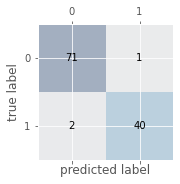

In [30]:
# 混淆矩阵
df = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
    header=None)
'''
乳腺癌数据集：569个恶性和良性肿瘤细胞的样本，M为恶性，B为良性
'''
from scipy.sparse.construct import random
from sklearn.preprocessing import LabelEncoder

x=df.iloc[:,2:].values
y=df.iloc[:,1].values
le=LabelEncoder() # 将M-B等字符串编码成计算机能识别的0-1
y=le.fit_transform(y)
le.transform(['M','B'])

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)
from sklearn.metrics import confusion_matrix

pipe_svc.fit(x_train,y_train)
y_pred=pipe_svc.predict(x_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

<Figure size 432x288 with 0 Axes>

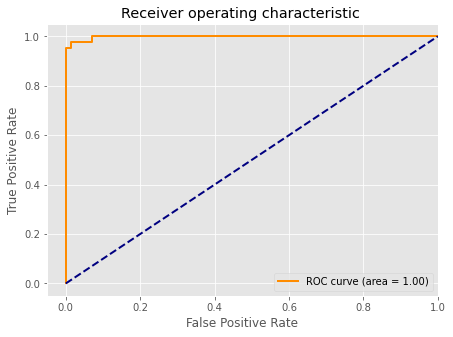

In [32]:
# 绘制ROC曲线：
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import make_scorer,f1_score
scorer = make_scorer(f1_score,pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring=scorer,cv=10)
y_pred = gs.fit(x_train,y_train).decision_function(x_test)
#y_pred = gs.predict(x_test)
fpr,tpr,threshold = roc_curve(y_test, y_pred) ###计算真阳率和假阳率
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假阳率为横坐标，真阳率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()